## transforms实战

(316, 316)


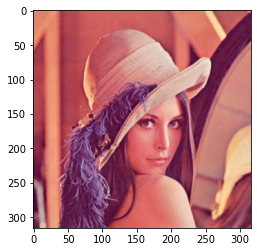

In [105]:
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
%matplotlib inline
# 加载原始图片
img = Image.open("./figures/lenna.jpg") 
print(img.size)
plt.imshow(img)

## transforms.CenterCrop(size)

(500, 500)
(224, 224)


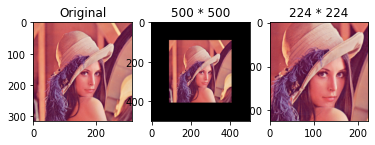

In [106]:
# 对给定图片进行沿中心切割
# 对图片沿中心放大切割，超出图片大小的部分填0
img_centercrop1 = transforms.CenterCrop((500,500))(img)
print(img_centercrop1.size)
# 对图片沿中心缩小切割，超出期望大小的部分剔除
img_centercrop2 = transforms.CenterCrop((224,224))(img)
print(img_centercrop2.size)
plt.subplot(1,3,1),plt.imshow(img),plt.title("Original")
plt.subplot(1,3,2),plt.imshow(img_centercrop1),plt.title("500 * 500")
plt.subplot(1,3,3),plt.imshow(img_centercrop2),plt.title("224 * 224")
plt.show()

## transforms.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0)

(316, 316)


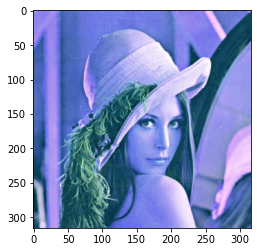

In [107]:
# 对图片的亮度，对比度，饱和度，色调进行改变
img_CJ = transforms.ColorJitter(brightness=1,contrast=0.5,saturation=0.5,hue=0.5)(img)
print(img_CJ.size)
plt.imshow(img_CJ)

## transforms.Grayscale(num_output_channels)

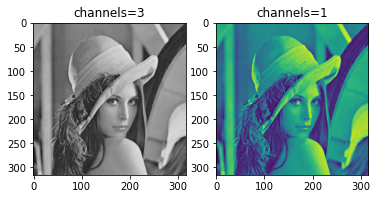

In [108]:
img_grey_c3 = transforms.Grayscale(num_output_channels=3)(img)
img_grey_c1 = transforms.Grayscale(num_output_channels=1)(img)
plt.subplot(1,2,1),plt.imshow(img_grey_c3),plt.title("channels=3")
plt.subplot(1,2,2),plt.imshow(img_grey_c1),plt.title("channels=1")
plt.show()

## transforms.Resize

(224, 224)


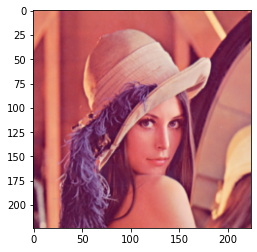

In [109]:
# 等比缩放
img_resize = transforms.Resize(224)(img)
print(img_resize.size)
plt.imshow(img_resize)

## transforms.Scale

(224, 224)


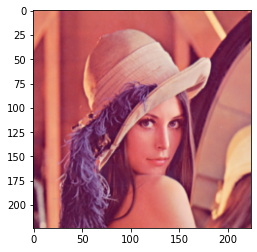

In [110]:
# 等比缩放 不推荐使用此转换以支持调整大小
img_scale = transforms.Scale(224)(img)
print(img_scale.size)
plt.imshow(img_scale)

## transforms.RandomCrop

(224, 224)


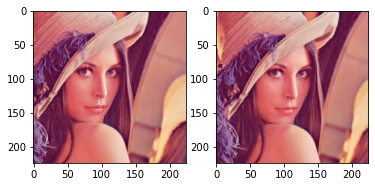

In [111]:
# 随机裁剪成指定大小
# 设立随机种子
import torch
torch.manual_seed(31)
# 随机裁剪
img_randowm_crop1 = transforms.RandomCrop(224)(img)
img_randowm_crop2 = transforms.RandomCrop(224)(img)
print(img_randowm_crop1.size)
plt.subplot(1,2,1),plt.imshow(img_randowm_crop1)
plt.subplot(1,2,2),plt.imshow(img_randowm_crop2)
plt.show()

## transforms.RandomHorizontalFlip

(316, 316)


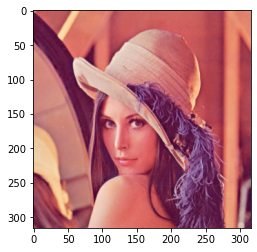

In [112]:
# 随机左右旋转
# 设立随机种子，可能不旋转
import torch
torch.manual_seed(31)

img_random_H = transforms.RandomHorizontalFlip()(img)
print(img_random_H.size)
plt.imshow(img_random_H)

## transforms.RandomVerticalFlip

(316, 316)


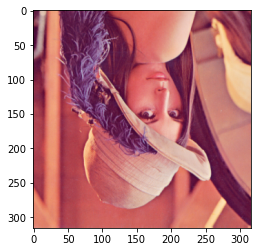

In [113]:
# 随机垂直方向旋转
img_random_V = transforms.RandomVerticalFlip()(img)
print(img_random_V.size)
plt.imshow(img_random_V)

## transforms.RandomResizedCrop

(224, 224)


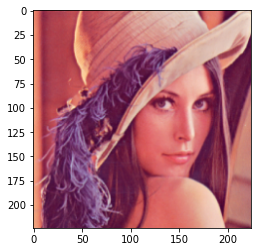

In [114]:
# 随机裁剪成指定大小
img_random_resizecrop = transforms.RandomResizedCrop(224,scale=(0.5,0.5))(img)
print(img_random_resizecrop.size)
plt.imshow(img_random_resizecrop)

## 对图片进行组合变化 tranforms.Compose()

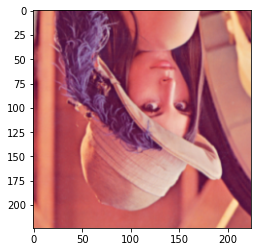

In [115]:
# 对一张图片的操作可能是多种的，我们使用transforms.Compose()将他们组装起来
transformer = transforms.Compose([
    transforms.Resize(256),
    transforms.transforms.RandomResizedCrop((224), scale = (0.5,1.0)),
    transforms.RandomVerticalFlip(),
])
img_transform = transformer(img)
plt.imshow(img_transform)